In [1]:
import numpy as np
import glob
from sklearn.model_selection import train_test_split
import cv2 as cv
import matplotlib.pyplot as plt

Inisiasi variabel yang dibutuhkan

In [2]:
radius = 2
n_points = 8 * radius
METHOD = 'uniform'

x = 0
training = []
responses = []
eps = 1e-7

# Praproses 

In [ ]:
Baca Dataset dan mengconvert warna asli gambar menjadi warna berformat HSV

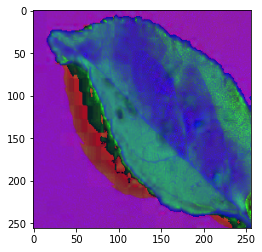

In [3]:
filename = "Datasets/Bacteria/0b170906-9436-4c0d-84c1-c396ad9d909b___FREC_Scab 3101.jpg"
im = cv.imread(filename)
#Convert warna menjadi HSV
hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
plt.imshow(hsv)

Dilakukan segmentasi terhadap gambar sehingga background pada gambar menjadi hilang atau dihitamkan.

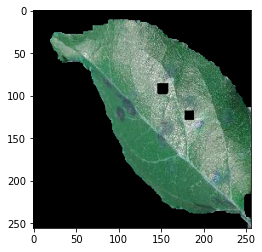

In [10]:
#Segmentasi warna pada dataset
lower_blue = np.array([25, 20, 72])

upper_blue = np.array([102, 255, 255])

#melakukan masking
mask = cv.inRange(hsv, lower_blue, upper_blue)
kernel = np.ones((10,10),np.uint8)
se_3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
se_5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))


dst_dilate = cv.dilate(mask, se_3, iterations = 1)
dst_erosi = cv.erode(dst_dilate, se_3, iterations = 2)
dst_dilate2 = cv.dilate(dst_erosi, se_5, iterations = 2)
dst_erosi2 = cv.erode(dst_dilate2, se_5,     iterations = 3)
dst_dilate3 = cv.dilate(dst_erosi2, se_3, iterations = 1)
            
res = cv.bitwise_and(im,im, mask= dst_dilate3)
plt.imshow(res)

In [ ]:
Proses ekstrasi fitur warna pada gambar untuk mendapatkan warna asli dari gambar yang sebelumnya
diubah ke dalam HSV menjadi nilai RGB

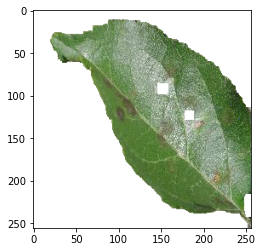

In [11]:
b,g,r = cv.split(res)
rgb = cv.merge([r,g,b])
for i in range(rgb.shape[0]):
    for j in range (rgb.shape[1]):
        if(rgb[i][j][0] == 0):
            rgb[i][j][0] = 255
        if(rgb[i][j][1] == 0):
            rgb[i][j][1] = 255
        if(rgb[i][j][2] == 0):
            rgb[i][j][2] = 255
gmbr = rgb.flatten()
training.append(gmbr)
responses.append(1)
plt.imshow(rgb)

In [ ]:
proses implementasi praproses data terhadap semua gambar yang telah dikumpulkan dari dataset

In [12]:
for filename in glob.glob("Datasets/Bacteria/*jpg"):
    #Baca Dataset
    im = cv.imread(filename)
    #Convert warna menjadi HSV
    hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
    
    #Segmentasi warna pada dataset
    lower_blue = np.array([25, 20, 72])
    upper_blue = np.array([102, 255, 255])
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    kernel = np.ones((10,10),np.uint8)
    se_3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    se_5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
    
    dst_dilate = cv.dilate(mask, se_3, iterations = 1)
    dst_erosi = cv.erode(dst_dilate, se_3, iterations = 2)
    dst_dilate2 = cv.dilate(dst_erosi, se_5, iterations = 2)
    dst_erosi2 = cv.erode(dst_dilate2, se_5,     iterations = 3)
    dst_dilate3 = cv.dilate(dst_erosi2, se_3, iterations = 1)
            
    res = cv.bitwise_and(im,im, mask= dst_dilate3)
    
    b,g,r = cv.split(res)
    rgb = cv.merge([r,g,b])
    for i in range(rgb.shape[0]):
       for j in range (rgb.shape[1]):
             if(rgb[i][j][0] == 0):
                 rgb[i][j][0] = 255
             if(rgb[i][j][1] == 0):
                 rgb[i][j][1] = 255
             if(rgb[i][j][2] == 0):
                 rgb[i][j][2] = 255
    gmbr = rgb.flatten()
    training.append(gmbr)
    responses.append(1)

In [13]:
for filename in glob.glob("Datasets/Fungi/*jpg"):
    im = cv.imread(filename)
    hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
    #Range warna biru segmentasi/klasifikasi
    lower_blue = np.array([25, 20, 72])
    upper_blue = np.array([102, 255, 255])
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    kernel = np.ones((10,10),np.uint8)
    se_3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    se_5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
            
    dst_dilate = cv.dilate(mask, se_3, iterations = 1)
    dst_erosi = cv.erode(dst_dilate, se_3, iterations = 2)
    dst_dilate2 = cv.dilate(dst_erosi, se_5, iterations = 2)
    dst_erosi2 = cv.erode(dst_dilate2, se_5, iterations = 3)
    dst_dilate3 = cv.dilate(dst_erosi2, se_3, iterations = 1)
            
    res = cv.bitwise_and(im,im, mask= dst_dilate3)
            
    #image = kontras_red(im)
    b,g,r = cv.split(res)
    rgb = cv.merge([r,g,b])
    for i in range(rgb.shape[0]):
       for j in range (rgb.shape[1]):
             if(rgb[i][j][0] == 0):
                 rgb[i][j][0] = 255
             if(rgb[i][j][1] == 0):
                 rgb[i][j][1] = 255
             if(rgb[i][j][2] == 0):
                 rgb[i][j][2] = 255
    gmbr = rgb.flatten()
    training.append(gmbr)
    responses.append(2)

In [14]:
for filename in glob.glob("Datasets/Nematodes/*jpg"):
    im = cv.imread(filename)
    hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
    #Range warna biru segmentasi/klasifikasi
    lower_blue = np.array([25, 20, 72])
    upper_blue = np.array([102, 255, 255])
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    kernel = np.ones((10,10),np.uint8)
    se_3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    se_5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
            
    dst_dilate = cv.dilate(mask, se_3, iterations = 1)
    dst_erosi = cv.erode(dst_dilate, se_3, iterations = 2)
    dst_dilate2 = cv.dilate(dst_erosi, se_5, iterations = 2)
    dst_erosi2 = cv.erode(dst_dilate2, se_5, iterations = 3)
    dst_dilate3 = cv.dilate(dst_erosi2, se_3, iterations = 1)
            
    res = cv.bitwise_and(im,im, mask= dst_dilate3)
            
    #image = kontras_red(im)
    b,g,r = cv.split(res)
    rgb = cv.merge([r,g,b])
    for i in range(rgb.shape[0]):
       for j in range (rgb.shape[1]):
             if(rgb[i][j][0] == 0):
                 rgb[i][j][0] = 255
             if(rgb[i][j][1] == 0):
                 rgb[i][j][1] = 255
             if(rgb[i][j][2] == 0):
                 rgb[i][j][2] = 255
    gmbr = rgb.flatten()
    training.append(gmbr)
    responses.append(3)

In [ ]:
for filename in glob.glob("Datasets/Normal/*jpg"):
    im = cv.imread(filename)
    hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
    #Range warna biru segmentasi/klasifikasi
    lower_blue = np.array([25, 20, 72])
    upper_blue = np.array([102, 255, 255])
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    kernel = np.ones((10,10),np.uint8)
    se_3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    se_5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
            
    dst_dilate = cv.dilate(mask, se_3, iterations = 1)
    dst_erosi = cv.erode(dst_dilate, se_3, iterations = 2)
    dst_dilate2 = cv.dilate(dst_erosi, se_5, iterations = 2)
    dst_erosi2 = cv.erode(dst_dilate2, se_5, iterations = 3)
    dst_dilate3 = cv.dilate(dst_erosi2, se_3, iterations = 1)
            
    res = cv.bitwise_and(im,im, mask= dst_dilate3)
            
    #image = kontras_red(im)
    b,g,r = cv.split(res)
    rgb = cv.merge([r,g,b])
    for i in range(rgb.shape[0]):
       for j in range (rgb.shape[1]):
             if(rgb[i][j][0] == 0):
                 rgb[i][j][0] = 255
             if(rgb[i][j][1] == 0):
                 rgb[i][j][1] = 255
             if(rgb[i][j][2] == 0):
                 rgb[i][j][2] = 255
    gmbr = rgb.flatten()
    training.append(gmbr)
    responses.append(4)

In [15]:
for filename in glob.glob("Datasets/Virus/*jpg"):
    im = cv.imread(filename)
    hsv = cv.cvtColor(im,cv.COLOR_BGR2HSV)
    #Range warna biru segmentasi/klasifikasi
    lower_blue = np.array([25, 20, 72])
    upper_blue = np.array([102, 255, 255])
    mask = cv.inRange(hsv, lower_blue, upper_blue)
    kernel = np.ones((10,10),np.uint8)
    se_3 = cv.getStructuringElement(cv.MORPH_RECT,(3,3))
    se_5 = cv.getStructuringElement(cv.MORPH_RECT,(5,5))
            
    dst_dilate = cv.dilate(mask, se_3, iterations = 1)
    dst_erosi = cv.erode(dst_dilate, se_3, iterations = 2)
    dst_dilate2 = cv.dilate(dst_erosi, se_5, iterations = 2)
    dst_erosi2 = cv.erode(dst_dilate2, se_5, iterations = 3)
    dst_dilate3 = cv.dilate(dst_erosi2, se_3, iterations = 1)
            
    res = cv.bitwise_and(im,im, mask= dst_dilate3)
            
    #image = kontras_red(im)
    b,g,r = cv.split(res)
    rgb = cv.merge([r,g,b])
    
    for i in range(rgb.shape[0]):
       for j in range (rgb.shape[1]):
             if(rgb[i][j][0] == 0):
                 rgb[i][j][0] = 255
             if(rgb[i][j][1] == 0):
                 rgb[i][j][1] = 255
             if(rgb[i][j][2] == 0):
                 rgb[i][j][2] = 255

    gmbr = rgb.flatten()
    training.append(gmbr)
    responses.append(5)

Membagi data sebesar 70% data train dan 30% data test

In [16]:
x_train, x_test, y_train, y_test = train_test_split(training, responses, test_size = 0.7, random_state = 150)

Klasifikasi data menggunakan algoritma Naive Bayes

In [18]:
#NAIVE BAYES
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
gnb.fit(x_train, y_train)

MultinomialNB()

Mencari hasil prediksi dan akurasi

In [19]:
y_pred = gnb.predict(x_test)
print('')
print('======================================================================')
print('')
print('Naive BAYES :')
#menampilkan presentasi akurasi
error = ((y_test != y_pred).sum()/len(y_pred))*100
print('error prediksi = %.2f' %error, '%')
akurasi = 100-error
print('akurasi = %.2f' %akurasi, '%')



Naive BAYES :
error prediksi = 18.57 %
akurasi = 81.43 %


In [22]:
from sklearn.metrics import confusion_matrix,classification_report

trainscore = gnb.score(x_train,y_train)
testscore = gnb.score(x_test,y_test)

y_pred = gnb.predict(x_test)

print("====Laporan Hasil Menggunakan SVM====")
print("Confusion MAtrix:")
print(confusion_matrix(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))
print("Akurasi core:",testscore)

====Laporan Hasil Menggunakan SVM====
Confusion MAtrix:
[[25  2  1  6]
 [ 5 35  1  1]
 [ 5  2 23  1]
 [ 2  0  0 31]]

              precision    recall  f1-score   support

           1       0.68      0.74      0.70        34
           2       0.90      0.83      0.86        42
           3       0.92      0.74      0.82        31
           5       0.79      0.94      0.86        33

    accuracy                           0.81       140
   macro avg       0.82      0.81      0.81       140
weighted avg       0.82      0.81      0.82       140

Akurasi core: 0.8142857142857143
